In [61]:
from pydub import AudioSegment
import pydub.scipy_effects
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft
from scipy.signal import butter, sosfilt

In [62]:
# importo audio

audio = AudioSegment.from_file("../audio_lab.m4a")

In [63]:
# recorto audio

#inicio_15s = 15 * 1000
#inicio_audio = audio[:inicio_15s]

In [76]:
# filtro paso bajo

filtered_audio = audio.low_pass_filter(500, order=3)

In [77]:
# extraigo una numpy array del audio original y otra del modificado

samples = audio.get_array_of_samples()
samples_filter = filtered_audio.get_array_of_samples()

Text(0.5, 1.0, 'Filtered')

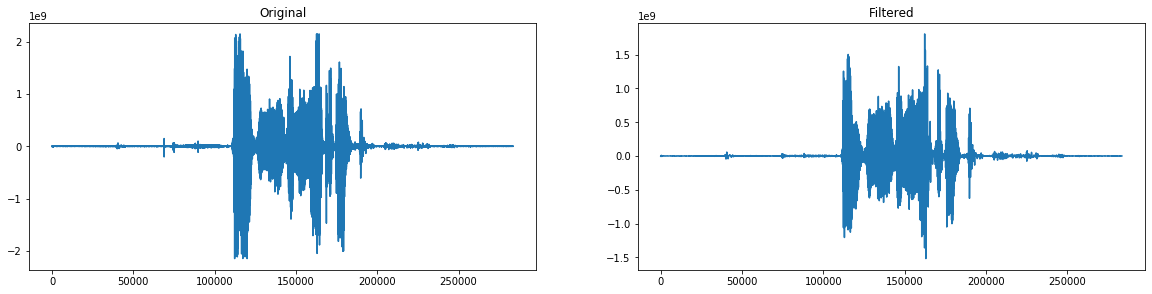

In [78]:
# Visualización audios

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(samples)
plt.title("Original")
plt.subplot(2,2,2)
plt.plot(samples_filter)
plt.title("Filtered")

In [ ]:
# diferencias entre los dos gráficos

In [79]:
filtered_audio.export("audio_pbajo.mp3", format="mp3")

<_io.BufferedRandom name='audio_pbajo.mp3'>

In [106]:
# filtro paso alto

In [80]:
new_audio = audio.high_pass_filter(100, order=5)

In [81]:
samples_new = new_audio.get_array_of_samples()

Text(0.5, 1.0, 'Filtered')

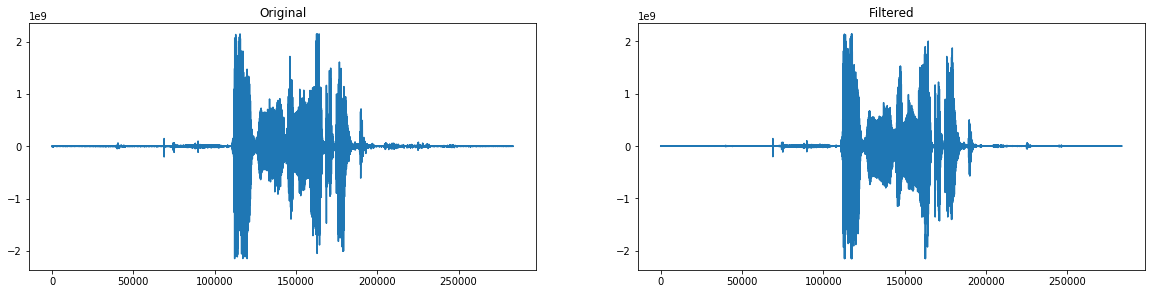

In [82]:
# Visualización audios

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(samples)
plt.title("Original")
plt.subplot(2,2,2)
plt.plot(samples_new)
plt.title("Filtered")

In [83]:
new_audio.export("audio_palto.mp3", format="mp3")

<_io.BufferedRandom name='audio_palto.mp3'>

In [ ]:
# Otra forma de hacer el filtro paso bajo

# b, a = signal.butter(3, 1/50)
# audio_filtered = signal.filtfilt(b, a, samples)

# forma de exportar el audio cuando se utiliza este método
#new_audio_data = modified_array_of_samples.tostring()
#new_audio_segment = original_audio_segment._spawn(data=new_audio_data)

In [151]:
# Otra forma de hacer el filtro paso bajo
# No consigo que tenga una calidad suficiente. Si el primer parametro es superior a 40 no se reproduce

b, a = signal.butter(40, 1/2)
audio_pbajo = signal.filtfilt(b, a, samples)

Text(0.5, 1.0, 'Filtered')

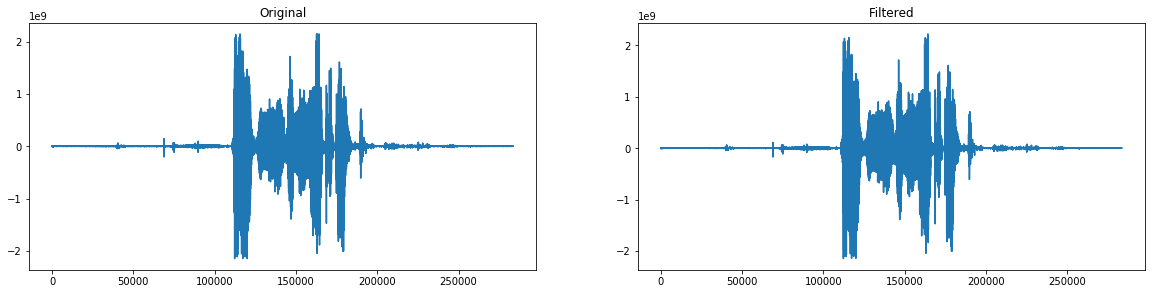

In [152]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("Original")
plt.plot(samples)
plt.subplot(2,2,2)
plt.plot(audio_pbajo)
plt.title("Filtered")

In [153]:
new_pbajo = audio_pbajo.tostring()
new_segmentpbajo = audio._spawn(data=new_pbajo)
new_segmentpbajo.export("audio_pbajo2.mp3", format="mp3")

<_io.BufferedRandom name='audio_pbajo2.mp3'>

In [171]:
# Otra forma de hacer el filtro paso alto
b, a = signal.butter(40, 1/2, btype="highpass")
audio_palto = signal.filtfilt(b, a, samples)

Text(0.5, 1.0, 'Filtered')

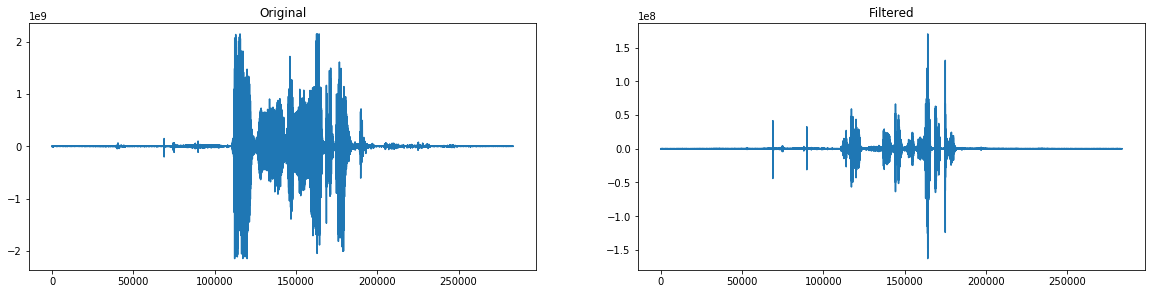

In [172]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("Original")
plt.plot(samples)
plt.subplot(2,2,2)
plt.plot(audio_palto)
plt.title("Filtered")

In [156]:
new_palto = audio_palto.tostring()
new_segmentpalto = audio._spawn(data=new_palto)
new_segmentpalto.export("audio_palto2.mp3", format="mp3")

<_io.BufferedRandom name='audio_palto2.mp3'>